In [1]:
import pandas as pd
import numpy as np
from numpy.random import *
import matplotlib.pyplot as plt
from scipy.special import comb
from numpy.random import *

In [2]:
def delta (theta, a, b, c):
    return ((1+b)/((c**(theta))*((a**(-theta))+b)))

In [3]:
def value(N, u, d, pi, default_x):
    val_arr = []
    recursive = []
    for l in range(2**(N+1)):
        for m in range(2):
            recursive.append(l)
    for l in range(N+1):
        val_arr.append([])
        val_arr[l] = [0 for m in range(2**l)]
        if l==0:
            val_arr[l][l]=default_x
        else:
            for n in range(len(val_arr[l])):
                if (n+1)%2!=0:
                    val_arr[l][n] = val_arr[l-1][recursive[n]]*(1+pi*(u-1))
                if (n+1)%2==0:
                    val_arr[l][n] = val_arr[l-1][recursive[n]]*(1+pi*(d-1))

    return val_arr[N]

In [18]:
def forward(N, theta, u, d, p, default_x):

    seed(123)

    q = (1-d)/(u-d)
    a = ((1-p)/p)*(q/(1-q))
    b = (1-q)/q
    c = (1-p)/(1-q)

    num = [ i for i in range(N+1)]
    stock = [[ [] for i in range(N+1) ] for j in range(N+1)]
    
    pi = (delta(theta, a, b, c)*((p/q)**(theta))-1)/(u-1)
    M = p*(1+pi*(u-1))**(1-(1/theta))+(p-1)*(1+pi*(d-1))**(1-(1/theta))
    
    for i in range(N+1):
        for j in range(N+1):
            #index
            stock[i][0] = i
            #node_num
            stock[i][1] = num[0:i+1]
            #up_times
            stock[i][2] = num[i::-1]
            #down_times
            stock[i][3] = num[0:i+1]
            #theta
            stock[i][4] = theta
            #u
            stock[i][5] = u
            #+(0.1*random()) if i>1 else u if i==1  else 0
            #d
            stock[i][6] = d
            #+(0.1*random()) if i>1 else d if i==1  else 0
            #p
            stock[i][7] = p
            #q
            stock[i][8] = (1-stock[i][6])/(stock[i][5]-stock[i][6]) if i>1 else q if i==1  else 0
            #a
            stock[i][9] = ((1-stock[i][7])/stock[i][7])*(stock[i][8]/(1-stock[i][8])) if i>1 else a if i==1 else 0
            #b
            stock[i][10] = ((1-stock[i][8])/stock[i][8]) if i>1 else b if i==1 else 0
            #c
            stock[i][11] = ((1-stock[i][7])/(1-stock[i][8])) if i>1 else c if i==1 else 0
            #pi
            stock[i][12] = (delta(theta, stock[i][9], stock[i][10], stock[i][11])*((stock[i][7]/stock[i][8])**(theta))-1)/(stock[i][5]-1) if i>1 else pi if i==1 else 0
            #price
            #stock[i][10] = list(map(lambda x, y: default_x if x==0 and y==0 else (default_x*x)+(default_x*y) if x==0 or y==0 else (default_x*x)*(default_x*y), stock[i][8], stock[i][9]))            
            #value
            stock[i][13] = value(i, stock[i][5], stock[i][6], stock[i][7], default_x)
            #Wealth
            #プログラム上、ここのNを10にして10期間にしている
            stock[i][14] = list(map(lambda x: (M**((10)-i))*((1/(1-theta))**(-1))*(x)**(1-(1/theta)), stock[i][13]))
            #U_0
            stock[i][15] = list(map(lambda x: ((1-(1/theta))**(-1))*(x**(1-(1/theta))), stock[i][13]))
            #I_0
            #stock[i][10] = list(map(lambda x: (x**(-1/theta))**(-1), stock[i][8]))
            #I_1
            #stock[i][11] = list(map(lambda x: (1+b)/((c**theta)*((a**(-theta))+b)*x, stock[i][10]))
            #U_1
            stock[i][16] = list(map(lambda x: (((1+b)/((c**(theta))*((a**(-theta))+b)))**(1/theta))*x, stock[i][15]))
            #pi
            #stock[i][14] = list(map(lambda x: ((((1+b)/((c**theta)*((a**(-theta))+b)))*((p/q)**theta)-1)/(u-1))*x, stock[i][13]))
            #Exp[U_1]
            stock[i][17] = list(map(lambda  l, m, n : comb(i, l, exact=True)*(p**l)*((1-p)**m)*n if (l!=0 and m!=0) \
                                 else (p**l)*n if m==0 \
                                 else ((1-p)**m)*n if l==0 \
                                 else nan \
                                 , stock[i][2], stock[i][3], stock[i][14]))
           
            
    df = pd.DataFrame(stock)
    df = df.set_index(0)
    df.columns = ["node_num", "up_times", "down_times", "theta", "u", "d", "p", "q", "a", "b", "c", "pi", "value", "wealth", "U_0", "U_1", "Exp_U1"]
    
    return df["Exp_U1"][10]
    

In [13]:
forward(18, 1.5, 1.2, 0.8, 0.4, 100)

,node_num,up_times,down_times,theta,u,d,p,q,a,b,c,pi,value,wealth,U_0,U_1,Exp_U1,Wealth_Exp
0,,,,,,,,,,,,,,,,,,
0,[0],[0],[0],1.5,1.2,0.8,0.4,0.0,0.0,0.0,0.0,0.000000,[100],[-1.2821597382550782e-05],[13.924766500838336],[13.78689292855529],[13.78689292855529],[-1.2821597382550782e-05]
1,"[0, 1]","[1, 0]","[0, 1]",1.5,1.2,0.8,0.4,0.5,1.5,1.0,1.2,-1.475296,"[108.0, 92.0]","[4.414208479268591e-05, 4.184473912124247e-05]","[14.286609467713795, 13.543072306422005]","[14.145153172341955, 13.408978010588635]","[5.658061268936782, 8.04538680635318]","[1.7656833917074366e-05, 2.5106843472745482e-05]"
2,"[0, 1, 2]","[2, 1, 0]","[0, 1, 2]",1.5,1.2,0.8,0.4,0.5,1.5,1.0,1.2,-1.475296,"[116.64000000000001, 99.36, 99.36000000000001,...","[-0.00015197198849001964, -0.00014406270664304...","[14.657855129612496, 13.894996732850954, 13.89...","[14.512723012057391, 13.757417920573987, 13.75...","[2.322035681929183, 6.603560601875514, 4.95267...","[-2.4315518158403147e-05, -6.915009918866383e-..."
3,"[0, 1, 2, 3]","[3, 2, 1, 0]","[0, 1, 2, 3]",1.5,1.2,0.8,0.4,0.5,1.5,1.0,1.2,-1.475296,"[125.97120000000002, 107.30880000000002, 107.3...","[0.0005232078501520492, 0.0004959778428821795,...","[15.038747820905405, 14.256066115395853, 14.25...","[14.889844362839714, 14.114912239536277, 14.11...","[0.9529500392217419, 4.065094724986448, 6.0976...","[3.3485302409731156e-05, 0.0001428416187500677..."
4,"[0, 1, 2, 3, 4]","[4, 3, 2, 1, 0]","[0, 1, 2, 3, 4]",1.5,1.2,0.8,0.4,0.5,1.5,1.0,1.2,-1.475296,"[136.04889600000004, 115.89350400000002, 115.8...","[-0.0018012954701761158, -0.001707548236196685...","[15.429538225130901, 14.626518090935765, 14.62...","[15.276765426129314, 14.481696251435725, 14.48...","[0.3910851949089105, 2.224388544220528, 5.0048...","[-4.611316403650857e-05, -0.000262279409079810..."
5,"[0, 1, 2, 3, 4, 5]","[5, 4, 3, 2, 1, 0]","[0, 1, 2, 3, 4, 5]",1.5,1.2,0.8,0.4,0.5,1.5,1.0,1.2,-1.475296,"[146.93280768000005, 125.16498432000004, 125.1...","[0.006201484495949483, 0.005878732328030721, 0...","[15.830483539981497, 15.006596471479032, 15.00...","[15.673740853021984, 14.858011354219908, 14.85...","[0.16049910633494516, 1.1410952720040892, 3.42...","[6.350320123852272e-05, 0.00045148664279275947..."
6,"[0, 1, 2, 3, 4, 5, 6]","[6, 5, 4, 3, 2, 1, 0]","[0, 1, 2, 3, 4, 5, 6]",1.5,1.2,0.8,0.4,0.5,1.5,1.0,1.2,-1.475296,"[158.68743229440005, 135.17818306560005, 135.1...","[-0.021350417291473935, -0.02023924891375821, ...","[16.24184764657784, 15.396551404627525, 15.396...","[16.08103191186689, 15.244105218699183, 15.244...","[0.06586790671100681, 0.5619586947821268, 2.10...","[-8.745130922587727e-05, -0.000746099671956782..."
7,"[0, 1, 2, 3, 4, 5, 6, 7]","[7, 6, 5, 4, 3, 2, 1, 0]","[0, 1, 2, 3, 4, 5, 6, 7]",1.5,1.2,0.8,0.4,0.5,1.5,1.0,1.2,-1.475296,"[171.38242687795207, 145.99243771084807, 145.9...","[0.0735050323543988, 0.06967951145519857, 0.06...","[16.663901283141374, 15.796639538210627, 15.79...","[16.49890666021966, 15.640231951550586, 15.640...","[0.0270318086721039, 0.2690620383089151, 1.210...","[0.00012043064500944704, 0.0011987105714660726..."
8,"[0, 1, 2, 3, 4, 5, 6, 7, 8]","[8, 7, 6, 5, 4, 3, 2, 1, 0]","[0, 1, 2, 3, 4, 5, 6, 7, 8]",1.5,1.2,0.8,0.4,0.5,1.5,1.0,1.2,-1.475296,"[185.09302102818825, 157.67183272771592, 157.6...","[-0.25306249089467875, -0.2398920205647881, -0...","[17.09692222318002, 16.20712418919736, 16.2071...","[16.927640121263746, 16.046652262557505, 16.04...","[0.011093698229871414, 0.1261960083214763, 0.6...","[-0.00016584703403273675, -0.00188658761516807..."


In [14]:


for i in range(3+1):
    stock.append([])
    tmp.append(i)
    for j in range(0,N+1):
        stock[i].append([])

NameError: name 'stock' is not defined

In [136]:
forward(15, 1.5, 1.2, 0.8, 0.4, 100)

,node_num,up_times,down_times,theta,up,down,prob,up_r,down_r,value,wealth,U_0,U_1,alpha,Exp_U1
0,,,,,,,,,,,,,,,
0,[0],[0],[0],1.5,1.2,0.8,0.4,[0],[0],[100],[-1.2821597382550782e-05],[13.924766500838336],[13.78689292855529],[-147.52955491057526],[13.78689292855529]
1,"[0, 1]","[1, 0]","[0, 1]",1.5,1.2,0.8,0.4,"[0, 1]","[1, 0]","[108.0, 92.0]","[4.414208479268591e-05, 4.184473912124247e-05]","[14.286609467713795, 13.543072306422005]","[14.145153172341955, 13.408978010588635]","[-159.3319193034213, -135.72719051772924]","[5.658061268936782, 8.04538680635318]"
2,"[0, 1, 2]","[2, 1, 0]","[0, 1, 2]",1.5,1.2,0.8,0.4,"[0, 1, 2]","[2, 1, 0]","[116.64000000000001, 99.36, 99.36000000000001,...","[-0.00015197198849001964, -0.00014406270664304...","[14.657855129612496, 13.894996732850954, 13.89...","[14.512723012057391, 13.757417920573987, 13.75...","[-172.07847284769502, -146.58536575914758, -14...","[2.322035681929183, 6.603560601875514, 4.95267..."
3,"[0, 1, 2, 3]","[3, 2, 1, 0]","[0, 1, 2, 3]",1.5,1.2,0.8,0.4,"[0, 1, 2, 3]","[3, 2, 1, 0]","[125.97120000000002, 107.30880000000002, 107.3...","[0.0005232078501520492, 0.0004959778428821795,...","[15.038747820905405, 14.256066115395853, 14.25...","[14.889844362839714, 14.114912239536277, 14.11...","[-185.84475067551062, -158.31219501987943, -15...","[0.9529500392217419, 4.065094724986448, 6.0976..."
4,"[0, 1, 2, 3, 4]","[4, 3, 2, 1, 0]","[0, 1, 2, 3, 4]",1.5,1.2,0.8,0.4,"[0, 1, 2, 3, 4]","[4, 3, 2, 1, 0]","[136.04889600000004, 115.89350400000002, 115.8...","[-0.0018012954701761158, -0.001707548236196685...","[15.429538225130901, 14.626518090935765, 14.62...","[15.276765426129314, 14.481696251435725, 14.48...","[-200.7123307295515, -170.97717062146978, -170...","[0.3910851949089105, 2.224388544220528, 5.0048..."
5,"[0, 1, 2, 3, 4, 5]","[5, 4, 3, 2, 1, 0]","[0, 1, 2, 3, 4, 5]",1.5,1.2,0.8,0.4,"[0, 1, 2, 3, 4, 5]","[5, 4, 3, 2, 1, 0]","[146.93280768000005, 125.16498432000004, 125.1...","[0.006201484495949483, 0.005878732328030721, 0...","[15.830483539981497, 15.006596471479032, 15.00...","[15.673740853021984, 14.858011354219908, 14.85...","[-216.76931718791562, -184.6553442711874, -184...","[0.16049910633494516, 1.1410952720040892, 3.42..."
6,"[0, 1, 2, 3, 4, 5, 6]","[6, 5, 4, 3, 2, 1, 0]","[0, 1, 2, 3, 4, 5, 6]",1.5,1.2,0.8,0.4,"[0, 1, 2, 3, 4, 5, 6]","[6, 5, 4, 3, 2, 1, 0]","[158.68743229440005, 135.17818306560005, 135.1...","[-0.021350417291473935, -0.02023924891375821, ...","[16.24184764657784, 15.396551404627525, 15.396...","[16.08103191186689, 15.244105218699183, 15.244...","[-234.11086256294888, -199.42777181288238, -19...","[0.06586790671100681, 0.5619586947821268, 2.10..."
7,"[0, 1, 2, 3, 4, 5, 6, 7]","[7, 6, 5, 4, 3, 2, 1, 0]","[0, 1, 2, 3, 4, 5, 6, 7]",1.5,1.2,0.8,0.4,"[0, 1, 2, 3, 4, 5, 6, 7]","[7, 6, 5, 4, 3, 2, 1, 0]","[171.38242687795207, 145.99243771084807, 145.9...","[0.0735050323543988, 0.06967951145519857, 0.06...","[16.663901283141374, 15.796639538210627, 15.79...","[16.49890666021966, 15.640231951550586, 15.640...","[-252.8397315679848, -215.38199355791298, -215...","[0.0270318086721039, 0.2690620383089151, 1.210..."
8,"[0, 1, 2, 3, 4, 5, 6, 7, 8]","[8, 7, 6, 5, 4, 3, 2, 1, 0]","[0, 1, 2, 3, 4, 5, 6, 7, 8]",1.5,1.2,0.8,0.4,"[0, 1, 2, 3, 4, 5, 6, 7, 8]","[8, 7, 6, 5, 4, 3, 2, 1, 0]","[185.09302102818825, 157.67183272771592, 157.6...","[-0.25306249089467875, -0.2398920205647881, -0...","[17.09692222318002, 16.20712418919736, 16.2071...","[16.927640121263746, 16.046652262557505, 16.04...","[-273.0669100934236, -232.61255304254604, -232...","[0.011093698229871414, 0.1261960083214763, 0.6..."


In [88]:
forward(14, 3, 1.2, 0.8, 0.4, 100).head()

,node_num,up_times,down_times,theta,up,down,prob,up_r,down_r,price,U_0,U_1,alpha,Exp_U1
0,,,,,,,,,,,,,,
0,[0],[0],[0],3,"[1.9917930997519155, 0.9640591723038818]","[1.6299907097242456, 0.2333731840861596]",0.483811,[0],[0],[100],[32.316520350478264],[31.118495001234137],[-271.4285714285714],[31.118495001234137]
1,"[0, 1]","[1, 0]","[0, 1]",3,"[1.8934335602088668, 0.3400808505181736]","[1.2717513883845202, 0.5063014868143146]",0.203272,"[0, 1]","[1, 0]","[100, 100]","[32.316520350478264, 32.316520350478264]","[31.118495001234137, 31.118495001234137]","[-271.4285714285714, -271.4285714285714]","[12.447398000493656, 18.67109700074048]"
2,"[0, 1, 2]","[2, 1, 0]","[0, 1, 2]",3,"[1.571521105945508, 0.2484133090733609]","[1.6904682699999674, 0.500995811633457]",0.905463,"[0, 1, 2]","[2, 1, 0]","[200, 10000, 200]","[51.29927840030092, 696.2383250419172, 51.2992...","[49.397531700626224, 670.4276513224261, 49.397...","[-542.8571428571428, -27142.85714285714, -542....","[7.903605072100198, 321.8052726347645, 17.7831..."
3,"[0, 1, 2, 3]","[3, 2, 1, 0]","[0, 1, 2, 3]",3,"[1.879131196833377, 0.43566383942086506]","[1.2913831690487863, 0.18592795211214297]",0.112719,"[0, 1, 2, 3]","[3, 2, 1, 0]","[300, 20000, 20000, 300]","[67.22107119835749, 1105.2094495921167, 1105.2...","[64.72907804978868, 1064.2375589777885, 1064.2...","[-814.2857142857142, -54285.71428571428, -5428...","[4.142660995186477, 306.5004169856031, 459.750..."
4,"[0, 1, 2, 3, 4]","[4, 3, 2, 1, 0]","[0, 1, 2, 3, 4]",3,"[1.7926237136185503, 0.7849880150324958]","[1.6046935908098519, 0.7674206692040997]",0.859598,"[0, 1, 2, 3, 4]","[4, 3, 2, 1, 0]","[400, 30000, 40000, 30000, 400]","[81.43252849784722, 1448.2340769084456, 1754.4...","[78.41369378620655, 1394.5457120424612, 1689.3...","[-1085.7142857142856, -81428.57142857142, -108...","[2.007390560926888, 214.2022213697221, 583.846..."


In [14]:
forward(12, 3, 1.1, 0.9, 0.4, 100)

TypeError: 'float' object is not iterable

In [52]:
df = forward(12, 3, 1.2, 0.8, 0.4, 100)
df.head()

,node_num,up_times,down_times,theta,prob,up_r,down_r,price,U_0,U_1,alpha,Exp_U1
0,,,,,,,,,,,,
0,[0],[0],[0],3,0.4,[0],[0],[100],[32.316520350478264],[31.118495001234137],[-271.4285714285714],[31.118495001234137]
1,"[0, 1]","[1, 0]","[0, 1]",3,0.4,"[0, 1.2]","[0.8, 0]","[80.0, 120.0]","[27.849533001676676, 36.4932119734404]","[26.81710605289703, 35.1403499528586]","[-217.1428571428571, -325.71428571428567]","[10.726842421158814, 21.084209971715158]"
2,"[0, 1, 2]","[2, 1, 0]","[0, 1, 2]",3,0.4,"[0, 1.2, 1.44]","[0.6400000000000001, 0.8, 0]","[64.00000000000001, 9600.0, 144.0]","[24.000000000000007, 677.5459407943408, 41.209...","[23.110281426650154, 652.4282238017356, 39.682...","[-173.71428571428572, -26057.142857142855, -39...","[3.6976450282640254, 313.1655474248331, 14.285..."
3,"[0, 1, 2, 3]","[3, 2, 1, 0]","[0, 1, 2, 3]",3,0.4,"[0, 1.2, 1.44, 1.7279999999999998]","[0.5120000000000001, 0.6400000000000001, 0.8, 0]","[51.20000000000001, 7680.000000000002, 11520.0...","[20.68257302430609, 583.8913915750468, 765.114...","[19.91583680078985, 562.2455992457379, 736.750...","[-138.9714285714286, -20845.71428571429, -3126...","[1.2746135552505509, 161.92673258277253, 318.2..."
4,"[0, 1, 2, 3, 4]","[4, 3, 2, 1, 0]","[0, 1, 2, 3, 4]",3,0.4,"[0, 1.2, 1.44, 1.7279999999999998, 2.0736]","[0.4096000000000001, 0.5120000000000001, 0.640...","[40.96000000000001, 6144.000000000001, 9216.00...","[17.823701121073075, 503.18234768810845, 659.3...","[17.162947873854105, 484.52856933311284, 634.9...","[-111.17714285714287, -16676.571428571428, -25...","[0.43937146557066514, 74.42358824956615, 219.4..."


In [55]:
df["U_1"][2]

[23.110281426650154, 652.4282238017356, 39.68200244775324]

In [44]:
print(((0.4)**2)*df["U_1"][2][0])
print(((0.4)*(0.6))*df["U_1"][2][1])
print(((0.6)**2)*df["U_1"][2][2])

3.6976450282640254
156.58277371241655
14.285520881191166


In [8]:
theta_arr = []
for i in range(11, 51):
    theta_arr.append(0.1*i)

for i in range(11, 51):
    last_u1_mean_over1 = [list(map(lambda x: x, theta_arr)), list(map(lambda x: min(forward(12, x, 1.2, 0.8, 0.4)), theta_arr))]
    
df_min = pd.DataFrame(last_u1_mean_over1).T
df_min.columns = ["theta", "min_U1"]

TypeError: forward() missing 1 required positional argument: 'default_x'

In [74]:
theta_arr = []
for i in range(11, 51):
    theta_arr.append(0.1*i)

for i in range(11, 51):
    last_u1_mean_over1 = [list(map(lambda x: x, theta_arr)), list(map(lambda x: max(forward(12, 3, 1.2, 0.8, 0.4, x)), theta_arr))]
    
df_max = pd.DataFrame(last_u1_mean_over1).T
df_max.columns = ["theta", "max_U1"]

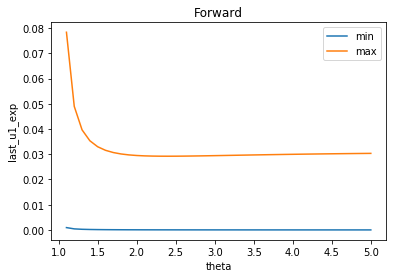

In [76]:
x_min = df_min["theta"]
y_min = df_min["min_U1"]

x_max = df_max["theta"]
y_max = df_max["max_U1"]

plt.plot(x_min, y_min, label = "min")
plt.plot(x_max, y_max, label = "max")

plt.title("Forward")
plt.xlabel("theta")
plt.ylabel("last_u1_exp")
plt.legend()
plt.show()

In [74]:
initial_x_arr = []
for i in range(1, 51):
    initial_x_arr.append(10000*i)

for i in range(1, 51):
    last_u1_mean_over1 = [list(map(lambda x: x, initial_x_arr)), list(map(lambda x: min(forward(12, 3, 1.2, 0.8, 0.4, x)), initial_x_arr))]
    
df_min = pd.DataFrame(last_u1_mean_over1).T
df_min.columns = ["initial_x", "min_U1"]

initial_x_arr = []
for i in range(1, 51):
    initial_x_arr.append(10000*i)

for i in range(1, 51):
    last_u1_mean_over1 = [list(map(lambda x: x, initial_x_arr)), list(map(lambda x: max(forward(12, 3, 1.2, 0.8, 0.4, x)), initial_x_arr))]
    
df_max = pd.DataFrame(last_u1_mean_over1).T
df_max.columns = ["initial_x", "max_U1"]


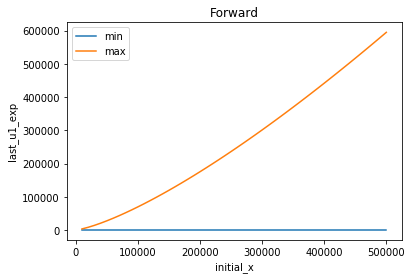

In [75]:
x_min = df_min["initial_x"]
y_min = df_min["min_U1"]

x_max = df_max["initial_x"]
y_max = df_max["max_U1"]

plt.plot(x_min, y_min, label = "min")
plt.plot(x_max, y_max, label = "max")

plt.title("Forward")
plt.xlabel("initial_x")
plt.ylabel("last_u1_exp")
plt.legend()
plt.show()

### theta

In [18]:
import matplotlib.pyplot as plt

x_arr = []
for i in range(11, 51):
    theta_arr.append(0.1*i)

for i in range(11, 51):
    last_u1_mean_over1 = [list(map(lambda x: x, theta_arr)), list(map(lambda x: forward(12, 1.2, 1.2, 0.8, 0.4, ), theta_arr))]
    
#theta_arr = []
#for i in range(1, 10):
#    theta_arr.append(0.1*i)

#for i in range(1, 10):
#    last_u1_mean_under1 = [list(map(lambda x: x, theta_arr)), list(map(lambda x: forward(12, x, 1.2, 0.8, 0.4), theta_arr))]
        
df = pd.DataFrame(last_u1_mean_over1).T
df.columns = ["theta", "last_u1_mean"]

#df_under = pd.DataFrame(last_u1_mean_under1).T
#df_under.columns = ["theta", "last_u1_mean"]

x = df["theta"]
y = df["last_u1_mean"]

plt.scatter(x, y, linewidth=0.1)
plt.title("Forward")
plt.xlabel("theta")
plt.ylabel("last_u1_mean")

TypeError: forward() missing 1 required positional argument: 'default_x'

In [17]:
plt_theta()

TypeError: forward() missing 1 required positional argument: 'default_x'

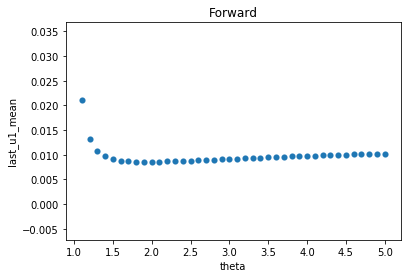

In [19]:
plt_theta(1.3)

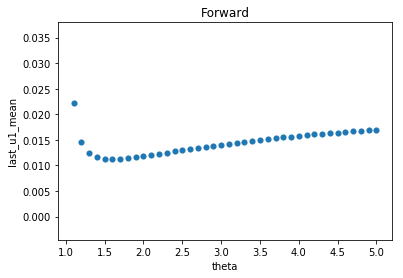

In [20]:
plt_theta(1.4)

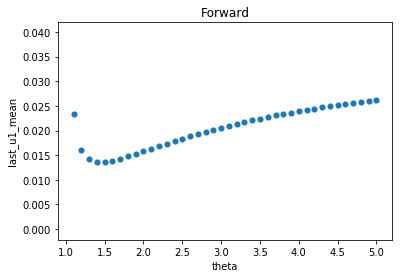

In [21]:
plt_theta(1.5)

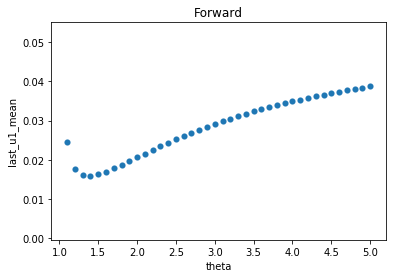

In [22]:
plt_theta(1.6)

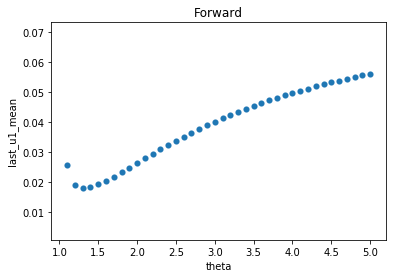

In [23]:
plt_theta(1.7)

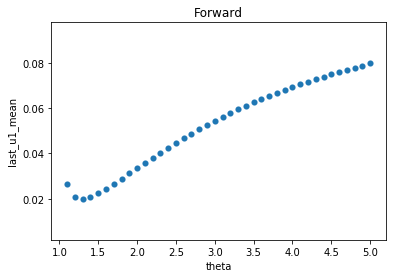

In [24]:
plt_theta(1.8)

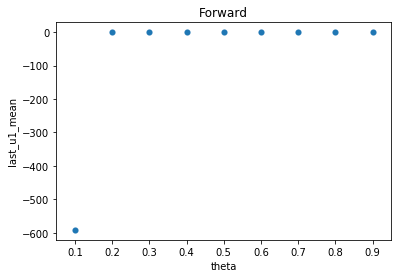

In [28]:
plt_theta(1.2)

In [207]:
import matplotlib.pyplot as plt
def plt_theta():
    theta_arr = []
    for i in range(11, 51):
        theta_arr.append(0.1*i)

    for i in range(11, 51):
        last_u1_mean_over1 = [list(map(lambda x: x, theta_arr)), list(map(lambda x: forward(11, x, 1.2, 0.8, 0.4), theta_arr))]
    """
    theta_arr = []
    for i in range(1, 10):
        theta_arr.append(0.1*i)

    for i in range(1, 10):
        last_u1_mean_under1 = [list(map(lambda x: x, theta_arr)), list(map(lambda x: forward(11, x, 1.2, 0.8, 0.4), theta_arr))]
    """    
    df_over = pd.DataFrame(last_u1_mean_over1).T
    df_over.columns = ["theta", "last_u1_mean"]

    df_under = pd.DataFrame(last_u1_mean_under1).T
    df_under.columns = ["theta", "last_u1_mean"]

    x = df_over["theta"]
    y = df_over["last_u1_mean"]

    plt.scatter(x, y, linewidth=0.1)
    plt.title("Forward")
    plt.xlabel("theta")
    plt.ylabel("last_u1_mean")

[5.078414162852684, 2.045421213764343, 1.3130822728457667, 1.0174168100668302, 0.8661240971056209, 0.7776935481789523, 0.7215309859224636, 0.6838299147510076, 0.6575281560791842, 0.6386713976224473, 0.6248893949842331, 0.61468406834979, 0.607067685174571, 0.6013662008546695, 0.5971063520495205, 0.593947818082918, 0.5916408675335055, 0.5899990358238956, 0.5888809943105033, 0.588178219071116, 0.5878064210666866, 0.5876994755223308, 0.587805047996585, 0.5880813946580639, 0.58849498933112, 0.5890187418184395, 0.5896306451017813, 0.5903127376535594, 0.5910503000081248, 0.591831227373454, 0.592645535850754, 0.5934849709887914, 0.5943426953854534, 0.5952130378290276, 0.5960912906996422, 0.5969735454745432, 0.5978565585093361, 0.5987376410182061, 0.5996145685033364, 0.6004855058974291]


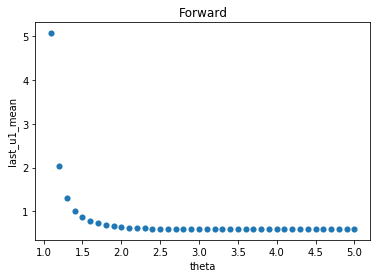

In [220]:
plt_theta_d(0.1)
theta_arr = []
for i in range(11, 51):
    theta_arr.append(0.1*i)

for i in range(11, 51):
    last_u1_mean_over1 = [list(map(lambda x: x, theta_arr)), list(map(lambda x: forward(11, x, 1.2, 0.1, 0.4), theta_arr))]
print(last_u1_mean_over1[1])

[8.082032148632488, 3.7105944589803355, 2.439324852164176, 1.8757792381315266, 1.571264183174392, 1.3861844303426591, 1.264572952148966, 1.1801249945470162, 1.1190300494661407, 1.0734179592943256, 1.038511052507243, 1.0112595816373535, 0.9896356825675684, 0.9722446463009892, 0.9580996213948897, 0.9464852800930834, 0.9368722296499078, 0.9288615510993857, 0.922147855627023, 0.9164940728507744, 0.9117138731200042, 0.9076591765102187, 0.9042111237471122, 0.9012734485383419, 0.898767544544128, 0.8966287470203141, 0.8948034975606797, 0.8932471592700536, 0.8919223167460659, 0.8907974414095978, 0.889845834965931, 0.8890447865981398, 0.8883748958444793, 0.8878195249607851, 0.8873643532480138, 0.8869970122454766, 0.8867067854841985, 0.8864843601054794, 0.8863216203915295, 0.8862114753531586]


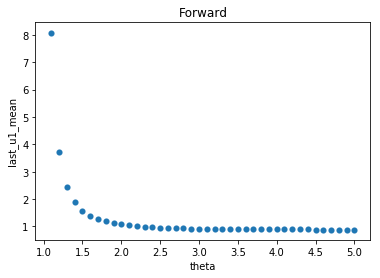

In [221]:
plt_theta_d(0.4)
theta_arr = []
for i in range(11, 51):
    theta_arr.append(0.1*i)

for i in range(11, 51):
    last_u1_mean_over1 = [list(map(lambda x: x, theta_arr)), list(map(lambda x: forward(11, x, 1.2, 0.4, 0.4), theta_arr))]
print(last_u1_mean_over1[1])

[10.865216898047963, 5.938168503879337, 4.332520443729128, 3.5513222083705354, 3.0966020180182627, 2.803105950439578, 2.6004274706190476, 2.45361521418827, 2.343412489633415, 2.2583724091678974, 2.191284586587797, 2.1373947479893833, 2.0934498775329304, 2.0571550026502323, 2.0268488458063882, 2.0013021709616923, 1.97958803644429, 1.9609958152410993, 1.9449727397495227, 1.9310832561068698, 1.918980194471638, 1.9083839548306498, 1.899067239199259, 1.8908436906998662, 1.883559329317877, 1.877086019099762, 1.8713164307524133, 1.8661601185750065, 1.8615404371359519, 1.857392097357355, 1.8536592141522636, 1.8502937353258107, 1.847254168655087, 1.8445045439769137, 1.8420135618388664, 1.8397538912617986, 1.8377015874410176, 1.8358356065002102, 1.8341373992238148, 1.8325905694032636]


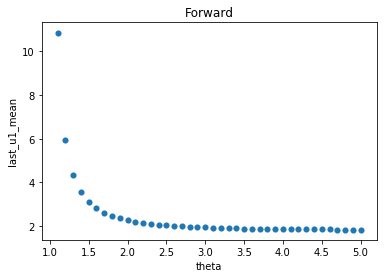

In [222]:
plt_theta_d(0.8)
theta_arr = []
for i in range(11, 51):
    theta_arr.append(0.1*i)

for i in range(11, 51):
    last_u1_mean_over1 = [list(map(lambda x: x, theta_arr)), list(map(lambda x: forward(11, x, 1.2, 0.8, 0.4), theta_arr))]
print(last_u1_mean_over1[1])

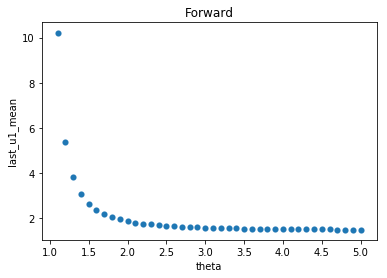

In [204]:
plt_theta_d(0.7)

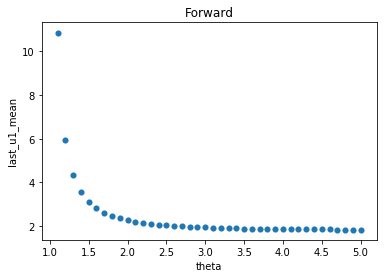

In [206]:
plt_theta_d(0.8)

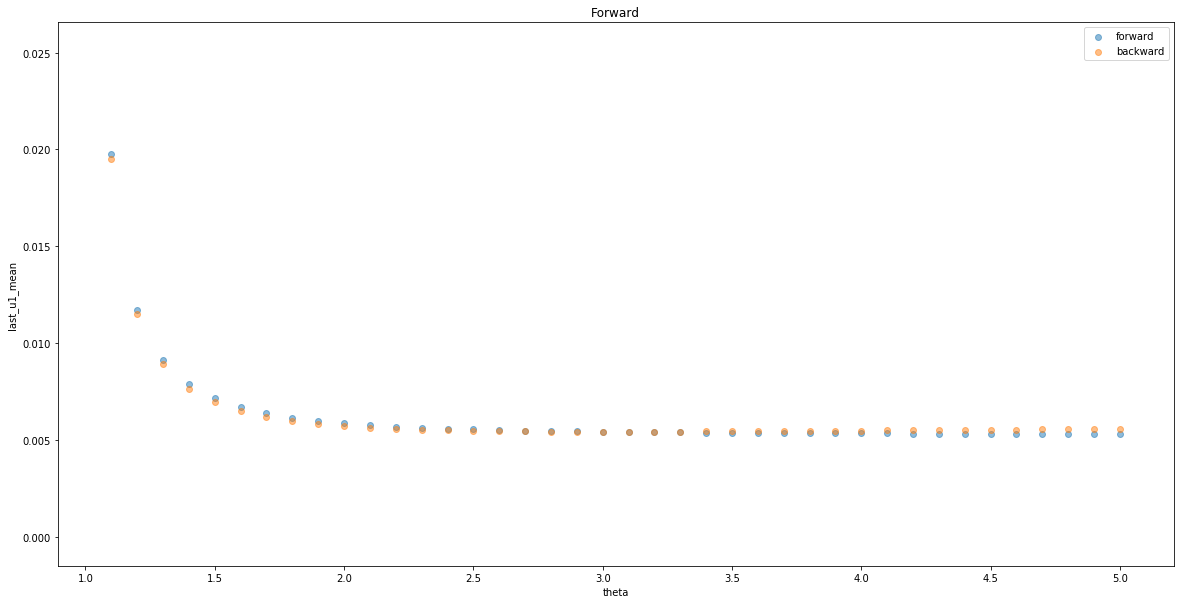

In [17]:
from Backward import backward

theta_arr = []
for i in range(11, 51):
    theta_arr.append(0.1*i)

for i in range(11, 51):
    last_u1_mean_over1 = [list(map(lambda x: x, theta_arr)), list(map(lambda x: forward(12, x, 1.2, 0.8, 0.4), theta_arr))]

df_over = pd.DataFrame(last_u1_mean_over1).T
df_over.columns = ["theta", "last_u1_mean"]
"""
df_under = pd.DataFrame(last_u1_mean_under1).T
df_under.columns = ["theta", "last_u1_mean"]
"""
fw_x = df_over["theta"]
fw_y = df_over["last_u1_mean"]

theta_arr = []
for i in range(11, 51):
    theta_arr.append(0.1*i)

for i in range(11, 51):
    last_u1_mean_over1 = [list(map(lambda x: x, theta_arr)), list(map(lambda x: backward(11, x, 1.2, 0.8, 0.4), theta_arr))]

df_over_bk = pd.DataFrame(last_u1_mean_over1).T
df_over_bk.columns = ["theta", "last_u1_mean"]

bk_x = df_over_bk["theta"]
bk_y = df_over_bk["last_u1_mean"]

#fig, axs = plt.subplots(2, 1, figsize=(10, 10))
#axs[0].(fw_x, fw_y)
#axs[1].scatter(bk_x, bk_y)
plt.figure(figsize=(20,10))
plt.scatter(fw_x, fw_y, label = "forward", alpha=0.5)
plt.scatter(bk_x, bk_y, label = "backward", alpha=0.5)
#axs[1, 0].scatter(data[0], data[1])
#axs[0, 1].plot(data[0], data[1])
#axs[1, 1].hist2d(data[0], data[1])

#plt.scatter(x, y, linewidth=0.1)
plt.title("Forward")
plt.xlabel("theta")
plt.ylabel("last_u1_mean")
plt.legend()
plt.show()

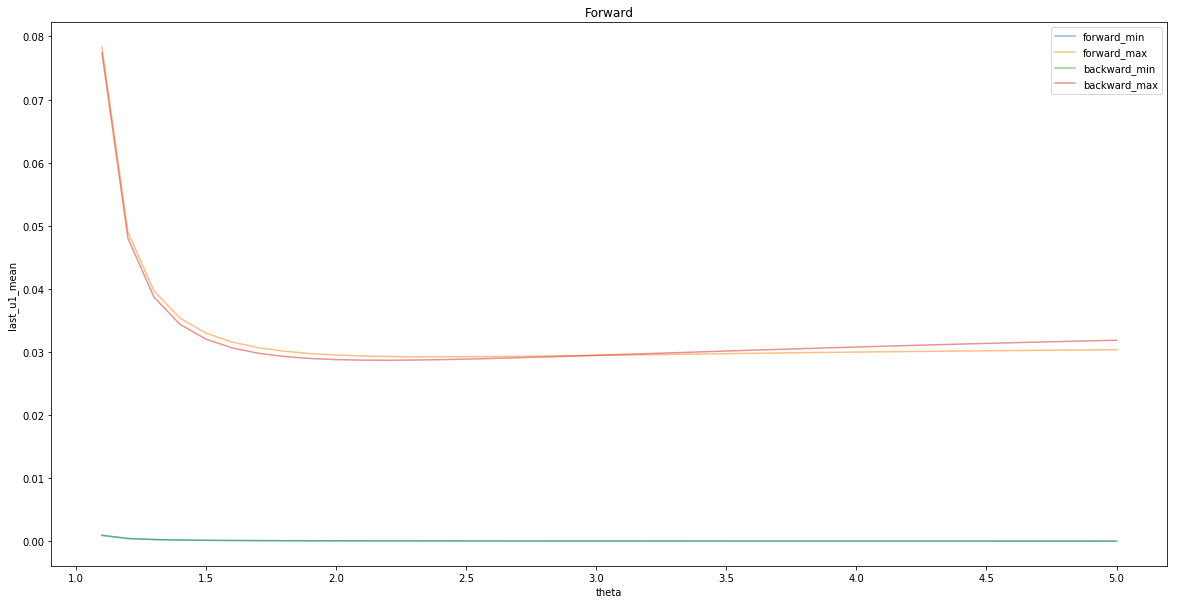

In [4]:
from Backward import backward

theta_arr = []
for i in range(11, 51):
    theta_arr.append(0.1*i)

for i in range(11, 51):
    last_u1_mean_over1 = [list(map(lambda x: x, theta_arr)), list(map(lambda x: min(forward(12, x, 1.2, 0.8, 0.4)), theta_arr))]

df_min_fw = pd.DataFrame(last_u1_mean_over1).T
df_min_fw.columns = ["theta", "min"]

theta_arr = []
for i in range(11, 51):
    theta_arr.append(0.1*i)

for i in range(11, 51):
    last_u1_mean_over1 = [list(map(lambda x: x, theta_arr)), list(map(lambda x: max(forward(12, x, 1.2, 0.8, 0.4)), theta_arr))]

df_max_fw = pd.DataFrame(last_u1_mean_over1).T
df_max_fw.columns = ["theta", "max"]


fw_min_x = df_min_fw["theta"]
fw_min_y = df_min_fw["min"]

fw_max_x = df_max_fw["theta"]
fw_max_y = df_max_fw["max"]

theta_arr = []
for i in range(11, 51):
    theta_arr.append(0.1*i)

for i in range(11, 51):
    last_u1_mean_over1 = [list(map(lambda x: x, theta_arr)), list(map(lambda x: min(backward(11, x, 1.2, 0.8, 0.4)), theta_arr))]

df_min_bk = pd.DataFrame(last_u1_mean_over1).T
df_min_bk.columns = ["theta", "min"]

bk_min_x = df_min_bk["theta"]
bk_min_y = df_min_bk["min"]

theta_arr = []
for i in range(11, 51):
    theta_arr.append(0.1*i)

for i in range(11, 51):
    last_u1_mean_over1 = [list(map(lambda x: x, theta_arr)), list(map(lambda x: max(backward(11, x, 1.2, 0.8, 0.4)), theta_arr))]

df_max_bk = pd.DataFrame(last_u1_mean_over1).T
df_max_bk.columns = ["theta", "max"]

bk_max_x = df_max_bk["theta"]
bk_max_y = df_max_bk["max"]

#fig, axs = plt.subplots(2, 1, figsize=(10, 10))
#axs[0].(fw_x, fw_y)
#axs[1].scatter(bk_x, bk_y)
plt.figure(figsize=(20,10))
plt.plot(fw_min_x, fw_min_y, label = "forward_min", alpha=0.5)
plt.plot(fw_max_x, fw_max_y, label = "forward_max", alpha=0.5)
plt.plot(bk_min_x, bk_min_y, label = "backward_min", alpha=0.5)
plt.plot(bk_max_x, bk_max_y, label = "backward_max", alpha=0.5)
#axs[1, 0].scatter(data[0], data[1])
#axs[0, 1].plot(data[0], data[1])
#axs[1, 1].hist2d(data[0], data[1])

#plt.scatter(x, y, linewidth=0.1)
plt.title("Forward")
plt.xlabel("theta")
plt.ylabel("last_u1_mean")
plt.legend()
plt.show()

### up

Text(0,0.5,'last_u1_mean')

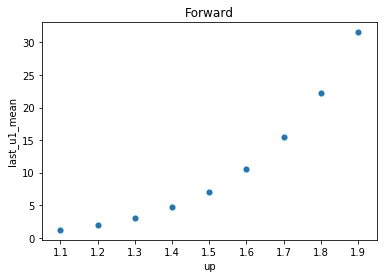

In [169]:
import matplotlib.pyplot as plt

up_arr = []
for i in range(11, 20):
    up_arr.append(0.1*i)
    
for i in range(11, 20):
    last_u1_mean = [list(map(lambda x: x, up_arr)), list(map(lambda x: forward(11, 3, x, 0.8, 0.4), up_arr))]

    
df_up = pd.DataFrame(last_u1_mean).T
df_up.columns = ["up", "last_u1_mean"]

x = df_up["up"]
y = df_up["last_u1_mean"]

plt.scatter(x, y, linewidth=0.1)
plt.title("Forward")
plt.xlabel("up")
plt.ylabel("last_u1_mean")

### down

In [65]:
import matplotlib.pyplot as plt

down_arr = []
for i in range(1, 10):
    down_arr.append(0.1*i)
    
for i in range(1, 10):
    last_u1_mean = [list(map(lambda x: x, down_arr)), list(map(lambda x: forward(11, 3, 1.2, x, 0.4), down_arr))]

    
df_down = pd.DataFrame(last_u1_mean).T
df_down.columns = ["down", "last_u1_mean"]

x = df_down["down"]
y = df_down["last_u1_mean"]

plt.scatter(x, y, linewidth=0.1)
plt.title("Forward")
plt.xlabel("up")
plt.ylabel("last_u1_mean")

TypeError: forward() missing 1 required positional argument: 'default_x'

In [ ]:
from ipywidgets import interact

from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure

# 出力先の宣言
output_notebook()

# データの定義

# figure()を宣言
p = figure(title = "Forward_type",
           plot_height = 300,
           plot_width = 600,
           x_range = (0, 11))

# rendererを追加
# ただp.line()とするのではなく、変数rに格納する
r = p.line(x, y, line_width = 3)

# グリグリ動かすボタンを作るには、Interactorを定義する
# 今回は、f, w, A, phiという4変数を動かすことで"r"と名付けたrendererを操作する
def update(f, w=1, A=1, phi=0):
    if  f == "sin": func = np.sin
    elif f == "cos": func = np.cos
    elif f == "tan": func = np.tan
    r.data_source.data['y'] = A * func(x * w + phi)
    push_notebook()

# 描画
show(p, notebook_handle = True) # notebook_handle = Trueにすると、後から描画内容を操作出来る

In [19]:
df = forward(11, 3, 1.2, 0.8, 0.4)

In [10]:
x = np.linspace(0, 2*np.pi, 2000)
y = np.sin(x)
p = figure(title="simple line example", plot_height=300, plot_width=600, y_range=(-5,5))
r = p.circle(x, y, color="#2222aa", line_width=3)

def update(x, w=1, A=1, phi=0):
    func = np.sin
    r.data_source.data['y'] = A * func(w * x + phi)
    push_notebook()
        
    
show(p, notebook_handle=True)

NameError: name 'figure' is not defined

In [132]:
interact(forward, N=(11), theta=(0.1,5, 0.1), u=(1.0, 2.0, 0.1), d=(0.1, 1.0, 0.1), p=(0.1, 1, 0.1))

interactive(children=(IntSlider(value=11, description='N', max=33, min=-11), FloatSlider(value=2.5000000000000…

<function __main__.forward>

In [14]:
from bokeh.io import output_notebook, push_notebook, show
from bokeh.plotting import figure
from ipywidgets import interact

output_notebook()
x = np.linspace(0, 2*np.pi, 10)
y = np.sin(x)
p = figure(title="simple line example", plot_height=300, plot_width=600, y_range=(-20,20))
r = p.circle(x, y, color="#2222aa", line_width=3)

def update(f, w=1, A=1, phi=0):
    r.data_source.data = {'x': df.index, 'y': df['U_1']}
    push_notebook()
show(p, notebook_handle=True)
#interact(forward, N=(11), theta=(0.1,5, 0.1), u=(1.0, 2.0, 0.1), d=(0.1, 1.0, 0.1), p=(0.1, 1, 0.1))
def redraw(n=10):
    ma.data_source.data = {'x': df.index, 'y': df['close'].rolling(n).mean()}
    push_notebook(handle=handle)

Loading BokehJS ...

In [15]:
import numpy as np
from bokeh.io import output_notebook, push_notebook
from bokeh.plotting import figure, ColumnDataSource, show

from bokeh.layouts import layout, row, widgetbox
from bokeh.models.widgets import Slider

import ipywidgets
from ipywidgets import interact
from IPython.display import display


# (1).イベントハンドラー関数の定義
def r_on_value_change(change):
    r = np.array([change["new"]])
    theta = np.array([theta_widgets.value])
    x = np.c_[0., r*np.cos(theta)]
    y = np.c_[0., r*np.sin(theta)]
    source.data = dict(r=r, theta=theta)
    source2.data = dict(x=x, y=y)
    push_notebook(handle=t) 

def theta_on_value_change(change):
    r = np.array([r_widgets.value])
    theta = np.array([change["new"]])
    x = np.c_[0., r*np.cos(theta)]
    y = np.c_[0., r*np.sin(theta)]
    source.data = dict(r=r, theta=theta)
    source2.data = dict(x=x, y=y)
    push_notebook(handle=t) 

output_notebook()

# (2). データの準備
r = np.array([0.])
theta = np.array([0.])
x = np.c_[0, r*np.cos(theta)]
y = np.c_[0, r*np.sin(theta)]

source = ColumnDataSource(data=dict(r=r, theta=theta))
source2 = ColumnDataSource(data=dict(x=x, y=y))

r_min, r_max = 0, 1
theta_min, theta_max = 0, 2*np.pi

# (3). figureの準備
left = figure(width=320, height=320, title="left", x_range=(r_min - 1, r_max+1), y_range=(theta_min-1, theta_max+1) ,x_axis_label='r',  y_axis_label='theta')
left.asterisk('r', 'theta', size=10, angle=0.0, source=source)

right = figure(width=320, height=320, title="right", x_range=(-r_max-1, r_max+1), y_range=(-r_max-1, r_max+1), x_axis_label='x',  y_axis_label='y')
right.line('x', 'y', line_width=2, line_cap="round", line_join="miter", source=source2)

# (4). ウィジェットの準備
r_widgets = ipywidgets.FloatSlider(\
    value=0, min=r_min, max=r_max, step=0.01)
r_widgets.observe(r_on_value_change, names="value")

theta_widgets = ipywidgets.FloatSlider(
    value=0, min=theta_min, max=theta_max, step=0.01)
theta_widgets.observe(theta_on_value_change, names="value")
display(r_widgets,theta_widgets)

# (5). レイアウトを決める
plots = row(left, right)
t = show(plots, notebook_handle=True)

Loading BokehJS ...

FloatSlider(value=0.0, max=1.0, step=0.01)

FloatSlider(value=0.0, max=6.283185307179586, step=0.01)

In [20]:
### 必要なモジュールの読み込み、設定
import numpy as np
from sympy import *
from ipywidgets import interact
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure, output_file

output_notebook() # 描画をjupyter notebookに出力

### 描画
## 1.データの定義
data_x_array = np.arange(0, 1, 0.01)
data_mu_array = np.arange(0, 1, 0.01)

def my_beta(data_a, data_b, data_mu):
    '''
    ベータ分布の確率密度関数
    a, bを設定した上で任意のmuを入れると、muがその値である確率を返す
    data_a: a > 0
    data_b: b > 0
    data_mu: 0 <= mu <= 1
    '''
    # sympyでは、変数に使うアルファベットをあらかじめ定義する
    # ここで使用したアルファベットを他の変数として使ってはならない
    a, b, t, x, mu = symbols('a b t x mu')

    # 関数の定義
    Gamma = Integral(t**(x - 1) * exp(-t), (t, 0, oo)) # ガンマ関数、この段階では積分を定義するだけで計算は行わない
    C = Gamma.subs(x, a + b) / (Gamma.subs(x, a) * Gamma.subs(x, b)) # ベータ分布の正規化項
    Beta = C * mu**(a - 1) * (1 - mu)**(b - 1) # ベータ分布の確率密度関数

    # a, bが与えられたときのmuの確率を計算
    prob = Beta.subs([(a, data_a), (b, data_b), (mu, data_mu)]).doit() # doit()は積分を計算するコマンド
    return np.float(prob)

data_prob_array = np.array([my_beta(1, 1, data_mu) for data_mu in data_mu_array]) # デフォルトではa=1, b=1の分布を描画する
# beta(a, b, mu)はsympy.core.numbers.NUMBERを返すので、floatに変換する必要がある

## 2.出力先の指定
# output_file("beta.html") # html保存をしたいときは#を外す

## 3.figureを宣言
p = figure(title = "Beta distribution",
          plot_height = 400,
          plot_width = 800,
          y_range = (0, 8))

## 4.rendererを追加
r = p.line(data_x_array, data_prob_array, line_width = 3)

## 5.interactorを定義
def update(data_a=1, data_b=1):
    r.data_source.data['y'] = np.array([my_beta(data_a, data_b, data_mu) for data_mu in data_mu_array])
    push_notebook()

## 6.描画
show(p, notebook_handle=True) # notebook_handleをTrueにすると後から図を制御出来る

## 7.interactorの実行
interact(update, data_a = (0, 20, 0.5), data_b = (0, 20, 0.5))

Loading BokehJS ...

interactive(children=(FloatSlider(value=1.0, description='data_a', max=20.0, step=0.5), FloatSlider(value=1.0,…

<function __main__.update>

In [6]:
import numpy as np
from sympy import *
from ipywidgets import interact
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure, output_file

output_notebook() # 描画をjupyter notebookに出力

## 1.データの定義
"""
data_x_array = np.arange(0, 1, 0.01)
data_mu_array = np.arange(0, 1, 0.01)

def my_beta(data_a, data_b, data_mu):
    '''
    ベータ分布の確率密度関数
    a, bを設定した上で任意のmuを入れると、muがその値である確率を返す
    data_a: a > 0
    data_b: b > 0
    data_mu: 0 <= mu <= 1
    '''
    # sympyでは、変数に使うアルファベットをあらかじめ定義する
    # ここで使用したアルファベットを他の変数として使ってはならない
    a, b, t, x, mu = symbols('a b t x mu')

    # 関数の定義
    Gamma = Integral(t**(x - 1) * exp(-t), (t, 0, oo)) # ガンマ関数、この段階では積分を定義するだけで計算は行わない
    C = Gamma.subs(x, a + b) / (Gamma.subs(x, a) * Gamma.subs(x, b)) # ベータ分布の正規化項
    Beta = C * mu**(a - 1) * (1 - mu)**(b - 1) # ベータ分布の確率密度関数

    # a, bが与えられたときのmuの確率を計算
    prob = Beta.subs([(a, data_a), (b, data_b), (mu, data_mu)]).doit() # doit()は積分を計算するコマンド
    return np.float(prob)

data_prob_array = np.array([my_beta(1, 1, data_mu) for data_mu in data_mu_array]) # デフォルトではa=1, b=1の分布を描画する
# beta(a, b, mu)はsympy.core.numbers.NUMBERを返すので、floatに変換する必要がある
"""
def forward(N, theta, u, d, p):

    q = (1-d)/(u-d)
    a = ((1-p)/p)*(q/(1-q))
    b = (1-q)/q
    c = (1-p)/(1-q)

    
    stock = []
    tmp = []
    for i in range(N+1):
        stock.append([])
        tmp.append(i)
        for j in range(0,N+1):
            stock[i].append([])
    for i in range(N+1):
        for j in range(N+1):
            stock[i][0] = i
            stock[i][1] = tmp[0:i+1]
            stock[i][2] = tmp[i::-1]
            stock[i][3] = tmp[0:i+1]
            stock[i][4] = theta
            stock[i][5] = p
            stock[i][6] = list(map(lambda x: 0 if x==0 else u**x, tmp[0:i+1]))
            stock[i][7] = list(map(lambda x: 0 if x==0 else d**x, tmp[i::-1]))
            #price
            stock[i][8] = list(map(lambda x, y: 1 if x==0 and y==0 else x+y if x==0 or y==0 else x*y, stock[i][6], stock[i][7]))
            #U_0
            stock[i][9] = list(map(lambda x: ((1-(1/theta))**(-1))*(x**(1-(1/theta))), stock[i][8]))
            #I_0
            #stock[i][10] = list(map(lambda x: (x**(-1/theta))**(-1), stock[i][8]))
            #I_1
            #stock[i][11] = list(map(lambda x: (1+b)/((c**theta)*((a**(-theta))+b)*x, stock[i][10]))
            #U_1
            stock[i][10] = list(map(lambda x: (((1+b)/((c**(theta))*((a**(-theta))+b)))**(1/theta))*x, stock[i][9]))
            #pi
            stock[i][11] = list(map(lambda x: ((((1+b)/((c**theta)*((a**(-theta))+b)))*((p/q)**theta)-1)/(u-1))*x, stock[i][8]))
            #Exp[U_1]
            stock[i][12] = list(map(lambda  l, m, n : (p**l)*((1-p)**m)*n if (l!=0 and m!=0) \
                                 else (p**l)*n if m==0 \
                                 else ((1-p)**m)*n if l==0 \
                                 else nan \
                                 , stock[i][2], stock[i][3], stock[i][10]))
            
    df = pd.DataFrame(stock)
    df = df.set_index(0)
    df.columns = ["node_num", "up_times", "down_times", "theta", "prob", "up_r", "down_r", "price", "U_0", "U_1", "alpha", "Exp_U1"]
    """
    x = np.linspace(0, 2*np.pi, 10)
    y = np.sin(x)
    plot = figure(title="simple line example", plot_height=300, plot_width=600, y_range=(-20,20))
    
    r = plot.circle(x, y, color="#2222aa")
    r.data_source.data['x'] = df.index
    r.data_source.data['y'] = df["U_1"]
    push_notebook()
    """
    last_u1_mean = list(map(lambda x: np.mean(x), df["Exp_U1"]))[10]
    
    return df["Exp_U1"][10]

def mk_arr_max (u, d, p):
    theta_arr = []
    for i in range(11, 51):
        theta_arr.append(0.1*i)

    for i in range(11, 51):
        last_u1_exp_max = [list(map(lambda x: x, theta_arr)), list(map(lambda x: max(forward(12, x, u, d, p)), theta_arr))]
    
    return last_u1_exp_max

def mk_arr_min (u, d, p):
    theta_arr = []
    for i in range(11, 51):
        theta_arr.append(0.1*i)

    for i in range(11, 51):
        last_u1_exp_min = [list(map(lambda x: x, theta_arr)), list(map(lambda x: min(forward(12, x, u, d, p)), theta_arr))]
    
    return last_u1_exp_min

default_arr = mk_arr_max(1.1, 0.9, 0.1)

p = figure(title = "forward",
          plot_height = 400,
          plot_width = 800,
          y_range = (0, 5))

## 4.rendererを追加
r = p.circle(default_arr[0], default_arr[1])

## 5.interactorを定義
def update(u=1.1, d=0.9, p=0.1):
    r.data_source.data['y'] =  mk_arr_max(u, d, p)[1]
    push_notebook()

## 6.描画
show(p, notebook_handle=True) # notebook_handleをTrueにすると後から図を制御出来る

## 7.interactorの実行
interact(update, u = (1.1, 1.9, 0.1), d = (0.1, 0.9, 0.1), p = (0.1, 0.9, 0.1))

<function __main__.update>

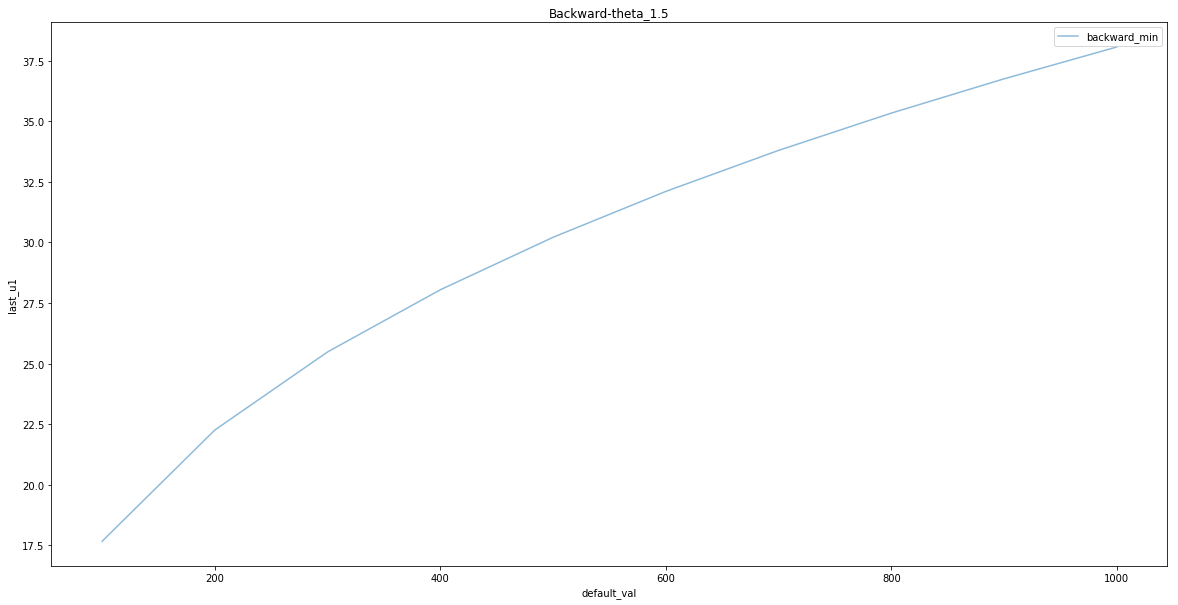

In [6]:
theta_arr = []

for i in range(1, 11):
    theta_arr.append(100*i)
    last_u1_mean_over1 = [list(map(lambda x: x, theta_arr)), list(map(lambda x: sum(forward(17, 1.5, 1.2, 0.8, 0.4, x)), theta_arr))]

df_min_bk = pd.DataFrame(last_u1_mean_over1).T
df_min_bk.columns = ["theta", "min"]

bk_min_x = df_min_bk["theta"]
bk_min_y = df_min_bk["min"]

plt.figure(figsize=(20,10))
plt.plot(bk_min_x, bk_min_y, label = "backward_min", alpha=0.5)
plt.title("Backward-theta_1.5")
plt.xlabel("default_val")
plt.ylabel("last_u1")
plt.legend()
plt.show()

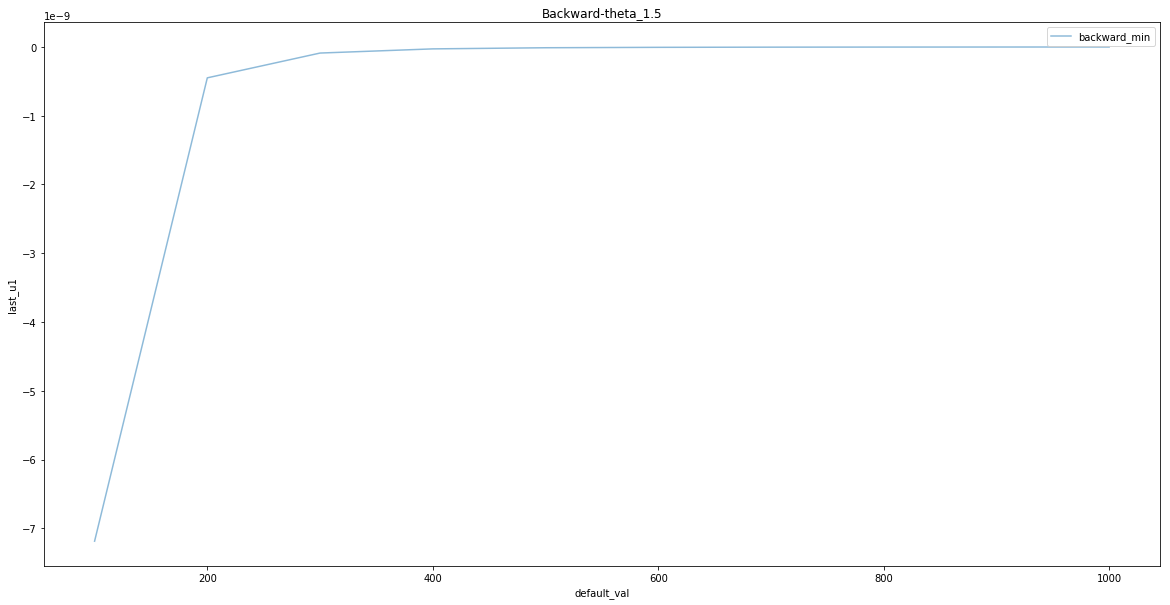

In [15]:
theta_arr = []

for i in range(1, 11):
    theta_arr.append(100*i)
    last_u1_mean_over1 = [list(map(lambda x: x, theta_arr)), list(map(lambda x: sum(forward(15, 0.2, 1.2, 0.8, 0.4, x)), theta_arr))]

df_min_bk = pd.DataFrame(last_u1_mean_over1).T
df_min_bk.columns = ["theta", "min"]

bk_min_x = df_min_bk["theta"]
bk_min_y = df_min_bk["min"]

plt.figure(figsize=(20,10))
plt.plot(bk_min_x, bk_min_y, label = "backward_min", alpha=0.5)
plt.title("Backward-theta_1.5")
plt.xlabel("default_val")
plt.ylabel("last_u1")
plt.legend()
plt.show()

In [22]:
theta_arr = []

for i in range(1, 11):
    theta_arr.append(500*i)
    last_u1_mean_over1 = [list(map(lambda x: x, theta_arr)), list(map(lambda x: sum(forward(17, 0.2, 1.2, 0.8, 0.4, x)), theta_arr))]

In [21]:
last_u1_mean_over1

[[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
 [1.430907386971797e-09,
  8.943171168573731e-11,
  1.766552329594813e-11,
  5.589481980358582e-12,
  2.289451819154875e-12,
  1.104095205996758e-12,
  5.959630932827147e-13,
  3.4934262377241137e-13,
  2.180928801968902e-13,
  1.430907386971797e-13]]